# 🎯 Objetivo Principal do Projeto

## Problema de Negócio
Desenvolver um modelo preditivo para **estimar custos de seguro de saúde** com base em características demográficas e de saúde dos beneficiários, permitindo que seguradoras façam precificações mais precisas e personalizadas.

## Objetivo Técnico
Implementar e avaliar um **modelo de regressão linear** para prever valores de custos médicos individuais, demonstrando competências em:
- Análise exploratória de dados (EDA)
- Pré-processamento e transformação de variáveis
- Modelagem estatística e Machine Learning
- Avaliação de performance de modelos
- Interpretação de resultados para tomada de decisão

## Objetivos de Aprendizado
- Aplicar conceitos fundamentais de **regressão linear** em um caso prático
- Desenvolver habilidades em **análise de dados** e **storytelling**
- Praticar o uso de bibliotecas Python (Pandas, NumPy, Scikit-learn, Matplotlib)
- Construir um **projeto completo** para portfólio profissional

## Métricas de Sucesso
- Alcançar **R² > 0.7** no conjunto de teste
- Identificar as **variáveis mais relevantes** para previsão de custos
- Validar **hipóteses de negócio** através da análise exploratória
- Apresentar **insights acionáveis** para o setor de seguros

# 1. BIBLIOTECAS:

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 2. DATASET:

In [145]:
# CARREGAR O DF:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [146]:
# INFORMAÇÕES BÁSICAS DO DATASET:
print("📊 INFORMAÇÕES BÁSICAS DO DATASET")
print("="*50)

print(f"\n Shape do dataset: {df.shape}")
print(f"   • {df.shape[0]} registros")
print(f"   • {df.shape[1]} colunas")

print(f"\n Tipos de dados:")
print(df.dtypes)

print(f"\n Informações gerais:")
print(df.info())

print(f"\n Estatísticas descritivas:")
print(df.describe())

print(f"\n Valores nulos por coluna:")
print(df.isnull().sum())

📊 INFORMAÇÕES BÁSICAS DO DATASET

 Shape do dataset: (1338, 7)
   • 1338 registros
   • 7 colunas

 Tipos de dados:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

 Estatísticas descritivas:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1

## **Estrutura do dataset:**  
  • Dataset com 1.338 registros e 7 colunas;  
  • Nenhum valor nulo;  
  • Variáveis categóricas (sex, smoker, region) e numéricas (age, bmi, children, charges) identificadas.

## **Desafios ou pontos de atenção:**  
  • Ampla variação nos valores de charges (de \$1.121 a \$63.770) pode exigir transformação;  
  • Variáveis categóricas precisarão de codificação antes da modelagem.

# 3. ANÁLISE EXPLORATÓRIA DE DADOS (EDA):

## 3.1 DISTRIBUIÇÃO DOS CUSTOS DE SEGURO (TARGET):

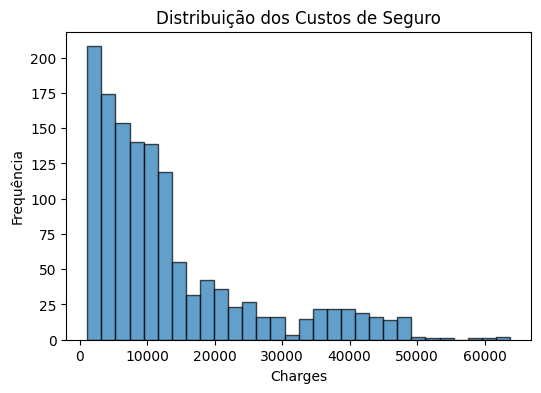

In [147]:
# HISTOGRAMA:
plt.figure(figsize=(6, 4))
plt.hist(df['charges'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribuição dos Custos de Seguro')
plt.xlabel('Charges')
plt.ylabel('Frequência')
plt.show()

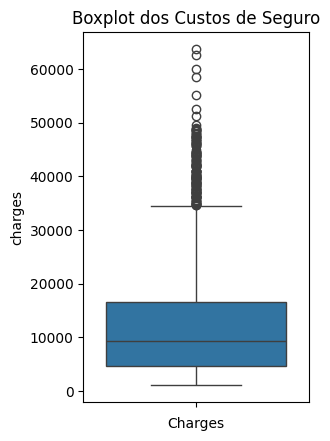

<Figure size 200x400 with 0 Axes>

In [148]:
# BOXPLOT:
plt.subplot(1,2,2)
sns.boxplot(y=df['charges'])
plt.title('Boxplot dos Custos de Seguro')
plt.xlabel('Charges')
plt.figure(figsize=(2, 4))
plt.tight_layout()
plt.show()

## 3.2. MATRIZ DE CORRELAÇÃO ENTRE AS VARIÁVEIS NUMÉRICAS (HEATMAP):

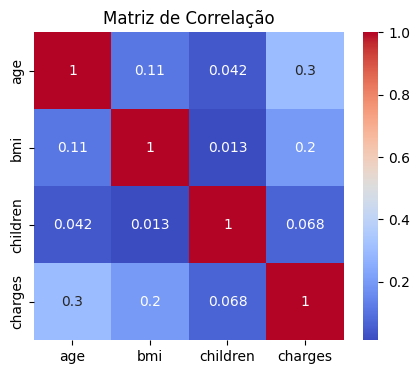

In [149]:
plt.figure(figsize=(5,4))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## 3.3. CUSTO POR FUMANTES:

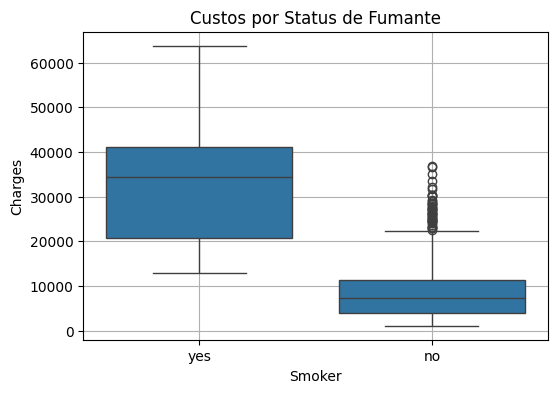

In [150]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Custos por Status de Fumante')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

## 3.4. CUSTO POR GÊNERO:

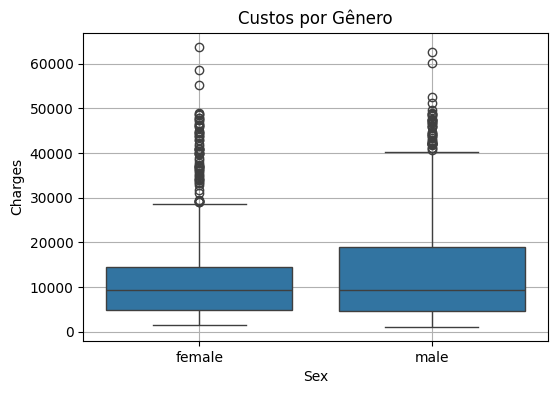

In [151]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Custos por Gênero')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

## 3.5. CUSTO POR REGIÃO:

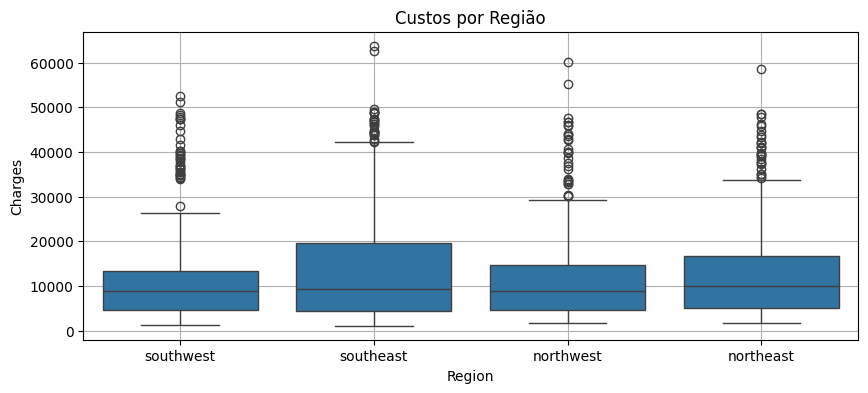

In [152]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='region', y='charges')
plt.title('Custos por Região')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

## 📝 Comentários e Observações da Etapa 3:

- **Principais descobertas:**  
  • **Smokers** apresentam custos muito maiores (média ≈ \$32K vs \$8.4K);  
  • **Age** e **charges** têm correlação positiva moderada (r ≈ 0.30);  
  • **BMI** também se relaciona positivamente com charges (r ≈ 0.20);  
  • Diferenças de charges por **sexo** e **região** são menores, mas visíveis em boxplots.

- **Desafios ou pontos de atenção:**  
  • A distribuição de charges é fortemente assimétrica à direita (skewed);  
  • Outliers em smoker podem influenciar modelo linear;  
  • Poderá ser útil transformar charges (log) ou tratar outliers.

# 4. PRÉ-PROCESSAMENTO DOS DADOS:

In [153]:
# GET DUMMY VARIABLES:
df_base = pd.get_dummies(df, drop_first=True)

In [154]:
df_base = df_base.astype({col: 'int' for col in df_base.select_dtypes('bool').columns})

In [155]:
# SPLIT DE TESTE E TREINO:
X = df_base.drop(['charges'], axis=1)
y = df_base['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [156]:
# NORMALIZAÇÃO:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
scaler = StandardScaler().fit(X_train[numeric_cols])

X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

In [157]:
print(f"• X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"• y_train: {y_train.shape}, y_test: {y_test.shape}")

• X_train: (1070, 8), X_test: (268, 8)
• y_train: (1070,), y_test: (268,)


# 5. MODELAGEM - REGRESSÃO LINEAR:

In [158]:
#TREINAMENTO DO MODELO:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [159]:
# PREDIÇÃO:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [160]:
# MÉTRICAS DE AVALIAÇÃO:

# TREINO:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# TESTE:
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("TREINO:")
print(f"MSE - Treino: {mse_train:.2f}")
print(f"RMSE - Treino: {rmse_train:.2f}")
print(f"R² (baseline) - Treino: {r2_train:.3f}")

print("\nTESTE:")
print(f"MSE - Teste: {mse_test:.2f}")
print(f"RMSE - Teste: {rmse_test:.2f}")
print(f"R² - Teste: {r2_test:.3f}")

TREINO:
MSE - Treino: 37277681.70
RMSE - Treino: 6105.55
R² (baseline) - Treino: 0.742

TESTE:
MSE - Teste: 33596915.85
RMSE - Teste: 5796.28
R² - Teste: 0.784


In [161]:
# CRIAÇÃO DO DATAFRAME DE COMPARAÇÃO:
comparison_df = pd.DataFrame({
    'Valor Real': y_test.values,
    'Valor Predito': y_pred_test,
    'Diferenca': y_test.values - y_pred_test,
    'Diferenca_Percentual': (((y_test.values - y_pred_test) / y_test.values) * 100).round(2)
}, index=y_test.index)

print("Comparação entre valores reais e preditos no teste:")
comparison_df.head(10)

Comparação entre valores reais e preditos no teste:


,Valor Real,Valor Predito,Diferenca,Diferenca_Percentual
764,9095.06825,8969.550274,125.517976,1.38
887,5272.17580,7068.747443,-1796.571643,-34.08
890,29330.98315,36858.410912,-7527.427762,-25.66
1293,9301.89355,9454.678501,-152.784951,-1.64
259,33750.29180,26973.173457,6777.118343,20.08
1312,4536.25900,10864.113164,-6327.854164,-139.49
899,2117.33885,170.280841,1947.058009,91.96
752,14210.53595,16903.450287,-2692.914337,-18.95
1286,3732.62510,1092.430936,2640.194164,70.73
707,10264.44210,11218.343184,-953.901084,-9.29


### Interpretação dos Resultados

- O modelo explica cerca de 74% a 78% da variância dos custos de seguro, o que indica uma boa capacidade preditiva para um modelo linear simples.
- O RMSE indica que, em média, o erro na predição é de aproximadamente \$5.800, o que é razoável considerando a amplitude dos valores de `charges` (até \$63.770).
- A similaridade entre as métricas de treino e teste sugere que o modelo não está sofrendo de overfitting, apresentando boa generalização.

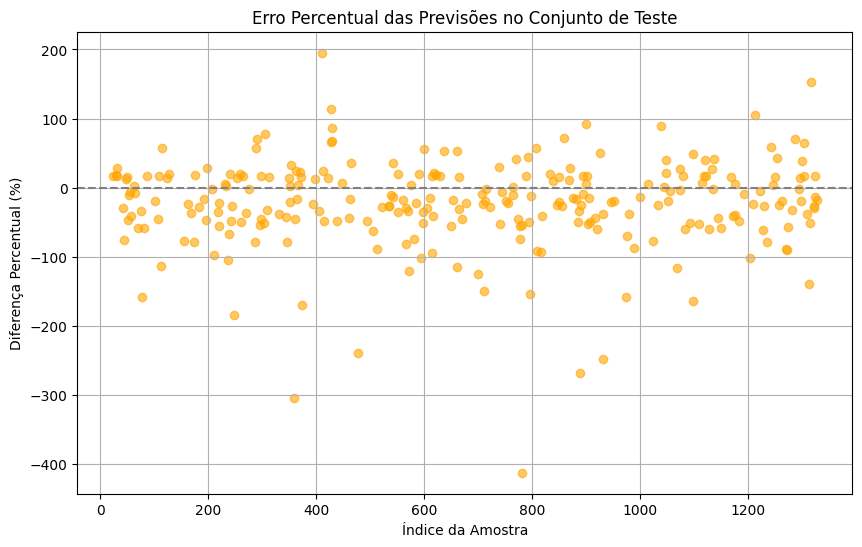

In [162]:
plt.figure(figsize=(10,6))
plt.scatter(comparison_df.index, comparison_df['Diferenca_Percentual'], alpha=0.6, color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Erro Percentual das Previsões no Conjunto de Teste')
plt.xlabel('Índice da Amostra')
plt.ylabel('Diferença Percentual (%)')
plt.grid(True)
plt.show()

### Análise do Erro Percentual nas Previsões

O gráfico de dispersão acima mostra o erro percentual entre os valores reais e preditos no conjunto de teste.

- A linha horizontal em zero representa a previsão perfeita, onde o erro percentual é nulo.
- Pontos acima da linha indicam que o modelo subestimou o custo real.
- Pontos abaixo da linha indicam que o modelo superestimou o custo real.
- Observa-se uma dispersão maior em alguns pontos, indicando que em certos casos o erro percentual pode ser elevado, o que pode ser resultado de outliers ou variabilidade natural dos dados.
- A maioria dos erros está concentrada próxima a zero, sugerindo que o modelo tem uma boa capacidade de previsão para a maioria dos casos.
- É esperado que haja casos com erros percentuais maiores, especialmente em valores menores de custo, onde pequenas diferenças absolutas representam grandes percentuais.

Essa análise ajuda a identificar os casos em que o modelo pode precisar de ajustes ou uma modelagem mais robusta, além de reforçar a importância de explorar transformações ou modelos alternativos para melhorar a precisão.


## 5.1. 📝 Comentários e Observações da Etapa 5:

- **Principais descobertas:**  
  • O modelo atingiu **R² = 0.784**, indicando que cerca de 78,4% da variância nos custos de seguro é explicada pelas variáveis selecionadas;  
  • **RMSE ≈ \$5.796** mostra que, em média, as previsões apresentam um erro absoluto de cerca de \$5,8 mil;  
  • **MSE ≈ 3,36×10⁷** revela sensibilidade a outliers, já que o erro quadrático penaliza de forma mais severa os desvios maiores.

- **Interpretação prática:**  
  • Um RMSE de \$5.796 representa cerca de **44% do custo médio** do dataset (média ≈ \$13.200), sugerindo uma margem considerável de erro, o que pode limitar sua aplicação em decisões individuais de precificação sem ajustes ou modelos complementares;  
  • Apesar do R² elevado, a presença de outliers (custos muito altos) limita a precisão em casos extremos.

- **Desafios e pontos de atenção:**  
  • **Assimetria e outliers** na variável `charges` resultam em erros extremos, impactando negativamente métricas como MSE e RMSE;  
  • A interpretação dos coeficientes exige atenção, especialmente devido à escala original de `charges`;  
  • Possível leve **multicolinearidade** entre variáveis numéricas como `age` e `bmi` pode afetar a estabilidade da regressão.